In [12]:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler, MinMaxScaler
import warnings
import matplotlib.pyplot as plt
import random
import copy
from sklearn.decomposition import PCA
from PIL import Image
import joblib

In [7]:
image_size = 60
input_image = 'datasets/anime_faces/'

n = 0
for image in os.listdir(input_image):
    n += 1

train_images = np.zeros((n, image_size, image_size, 3))

for i, image in enumerate(os.listdir(input_image)):
    img = Image.open(input_image + image)
    img = img.resize((image_size, image_size))
    train_images[i] = np.array(img)
    train_images[i] = train_images[i] / 255.0


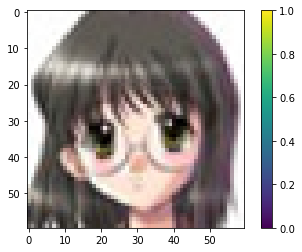

63565


In [8]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.show()
print(n)



In [13]:
latent_dim = 10

rf = RandomForestRegressor(n_estimators=150, max_depth=7, random_state=0, max_samples=1000, n_jobs=-1)
scaler = MinMaxScaler()
pca = PCA(n_components=latent_dim)

y = train_images.reshape(-1, image_size * image_size * 3).copy()
principle_components = pca.fit_transform(y)
X = scaler.fit_transform(principle_components)


print(X.shape, y.shape)

print('fitting')

rf.fit(X, y)

(63565, 10) (63565, 10800)
fitting


RandomForestRegressor(max_depth=7, max_samples=1000, n_estimators=150,
                      n_jobs=-1, random_state=0)

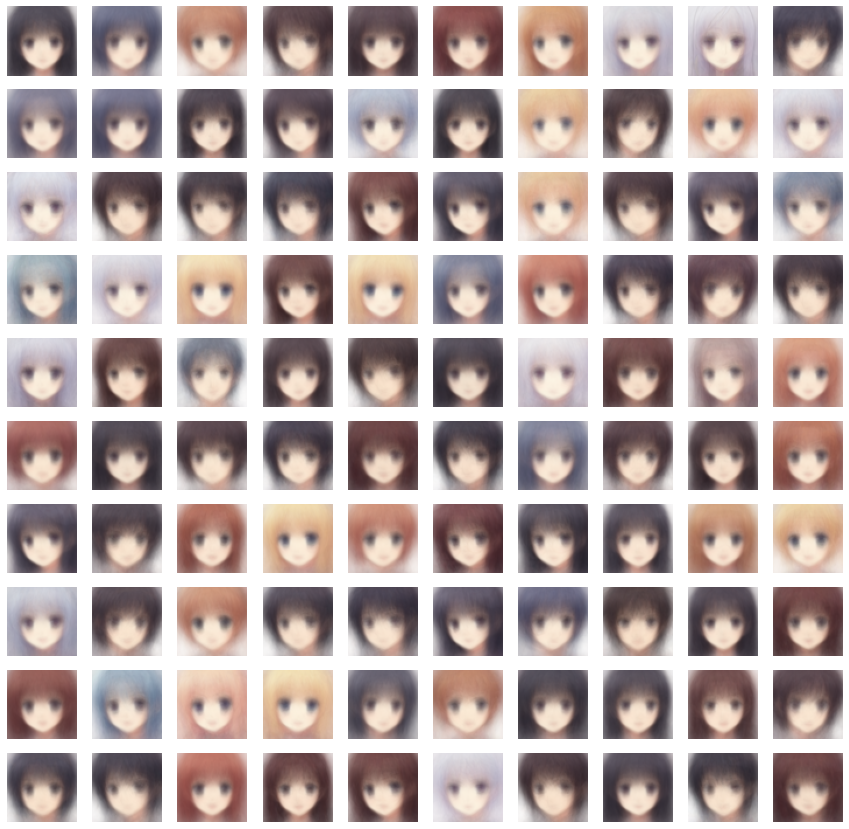

In [15]:
m = 100
threshold = 80
std_dev = 0.5


input = np.array([[random.uniform(0, 1) for j in range(latent_dim)] for i in range(m)])

y_pred = rf.predict(input)
y_pred = y_pred.reshape(m, image_size, image_size, 3)

fig, axs = plt.subplots(m//10, 10, figsize=(15, 15))
axs = axs.flatten()
# Plot data on the subplots
for i in range(m):
    axs[i].imshow(y_pred[i])
    axs[i].axis('off')  # Turn off axis labels and ticks
